In [67]:
wines["year"] = wines.title.str.extract('(19[0-9]{2}|20[01][0-9]|202[0-2])')

In [2]:
pip install pyspark

  Using cached pyspark-3.3.1-py2.py3-none-any.whl
  Using cached py4j-0.10.9.5-py2.py3-none-any.whl (199 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/01/16 15:11:06 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [8]:
flightData2015 = spark\
.read\
.option("inferSchema", "true")\
.option("header", "true")\
.csv("/Users/juan/Documents/Juan's MacBook Pro/CUNEF/Quinto/ETL/Practica Final/tempsMonthYear.csv")
flightData2015


DataFrame[Country: string, Year: int, AvgTemperature: double]

In [96]:
from datetime import datetime, date
import pandas as pd
from pyspark.sql import Row

import pandas as pd

wines = pd.read_json("/Users/juan/Documents/Juan's MacBook Pro/CUNEF/Quinto/ETL/Practica Final/winemag-data-130k-v2.json")
dfRaw = spark.createDataFrame(wines)



In [97]:
df = dfRaw.select("title", "description", "price", "points", "country")

In [101]:
df.count()

22/11/30 10:13:59 WARN TaskSetManager: Stage 2 contains a task of very large size (6502 KiB). The maximum recommended task size is 1000 KiB.
22/11/30 10:14:00 ERROR Executor: Exception in task 4.0 in stage 2.0 (TID 6)
org.apache.spark.SparkException: 
Error from python worker:
  Traceback (most recent call last):
    File "/usr/local/Cellar/python3/3.6.1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 183, in _run_module_as_main
      mod_name, mod_spec, code = _get_module_details(mod_name, _Error)
    File "/usr/local/Cellar/python3/3.6.1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 109, in _get_module_details
      __import__(pkg_name)
    File "/Users/juan/opt/anaconda3/envs/AINE/lib/python3.9/site-packages/pyspark/python/lib/pyspark.zip/pyspark/__init__.py", line 54, in <module>
    File "/Users/juan/opt/anaconda3/envs/AINE/lib/python3.9/site-packages/pyspark/python/lib/pyspark.zip/pyspark/rdd.py", line 33, in <module>
  ImportError:

22/11/30 10:14:00 WARN TaskSetManager: Lost task 5.0 in stage 2.0 (TID 7) (10.0.0.183 executor driver): TaskKilled (Stage cancelled)


Py4JJavaError: An error occurred while calling o115.count.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 4 in stage 2.0 failed 1 times, most recent failure: Lost task 4.0 in stage 2.0 (TID 6) (10.0.0.183 executor driver): org.apache.spark.SparkException: 
Error from python worker:
  Traceback (most recent call last):
    File "/usr/local/Cellar/python3/3.6.1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 183, in _run_module_as_main
      mod_name, mod_spec, code = _get_module_details(mod_name, _Error)
    File "/usr/local/Cellar/python3/3.6.1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 109, in _get_module_details
      __import__(pkg_name)
    File "/Users/juan/opt/anaconda3/envs/AINE/lib/python3.9/site-packages/pyspark/python/lib/pyspark.zip/pyspark/__init__.py", line 54, in <module>
    File "/Users/juan/opt/anaconda3/envs/AINE/lib/python3.9/site-packages/pyspark/python/lib/pyspark.zip/pyspark/rdd.py", line 33, in <module>
  ImportError: cannot import name 'NoReturn'
PYTHONPATH was:
  /Users/juan/opt/anaconda3/envs/AINE/lib/python3.9/site-packages/pyspark/python/lib/pyspark.zip:/Users/juan/opt/anaconda3/envs/AINE/lib/python3.9/site-packages/pyspark/python/lib/py4j-0.10.9.5-src.zip:/Users/juan/opt/anaconda3/envs/AINE/lib/python3.9/site-packages/pyspark/jars/spark-core_2.12-3.3.1.jar
org.apache.spark.SparkException: EOFException occurred while reading the port number from pyspark.daemon's stdout and terminated with code: 1.
	at org.apache.spark.errors.SparkCoreErrors$.eofExceptionWhileReadPortNumberError(SparkCoreErrors.scala:43)
	at org.apache.spark.api.python.PythonWorkerFactory.startDaemon(PythonWorkerFactory.scala:227)
	at org.apache.spark.api.python.PythonWorkerFactory.createThroughDaemon(PythonWorkerFactory.scala:134)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:107)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:124)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:164)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:65)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:365)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:329)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:365)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:329)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:365)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:329)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:365)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:329)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:365)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:329)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:365)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:329)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:99)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:52)
	at org.apache.spark.scheduler.Task.run(Task.scala:136)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:548)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1504)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:551)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1142)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:617)
	at java.lang.Thread.run(Thread.java:745)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2672)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2608)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2607)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2607)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1182)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1182)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1182)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2860)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2802)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2791)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
Caused by: org.apache.spark.SparkException: 
Error from python worker:
  Traceback (most recent call last):
    File "/usr/local/Cellar/python3/3.6.1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 183, in _run_module_as_main
      mod_name, mod_spec, code = _get_module_details(mod_name, _Error)
    File "/usr/local/Cellar/python3/3.6.1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 109, in _get_module_details
      __import__(pkg_name)
    File "/Users/juan/opt/anaconda3/envs/AINE/lib/python3.9/site-packages/pyspark/python/lib/pyspark.zip/pyspark/__init__.py", line 54, in <module>
    File "/Users/juan/opt/anaconda3/envs/AINE/lib/python3.9/site-packages/pyspark/python/lib/pyspark.zip/pyspark/rdd.py", line 33, in <module>
  ImportError: cannot import name 'NoReturn'
PYTHONPATH was:
  /Users/juan/opt/anaconda3/envs/AINE/lib/python3.9/site-packages/pyspark/python/lib/pyspark.zip:/Users/juan/opt/anaconda3/envs/AINE/lib/python3.9/site-packages/pyspark/python/lib/py4j-0.10.9.5-src.zip:/Users/juan/opt/anaconda3/envs/AINE/lib/python3.9/site-packages/pyspark/jars/spark-core_2.12-3.3.1.jar
org.apache.spark.SparkException: EOFException occurred while reading the port number from pyspark.daemon's stdout and terminated with code: 1.
	at org.apache.spark.errors.SparkCoreErrors$.eofExceptionWhileReadPortNumberError(SparkCoreErrors.scala:43)
	at org.apache.spark.api.python.PythonWorkerFactory.startDaemon(PythonWorkerFactory.scala:227)
	at org.apache.spark.api.python.PythonWorkerFactory.createThroughDaemon(PythonWorkerFactory.scala:134)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:107)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:124)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:164)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:65)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:365)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:329)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:365)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:329)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:365)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:329)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:365)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:329)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:365)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:329)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:365)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:329)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:99)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:52)
	at org.apache.spark.scheduler.Task.run(Task.scala:136)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:548)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1504)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:551)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1142)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:617)
	at java.lang.Thread.run(Thread.java:745)


22/11/30 10:14:00 WARN TaskSetManager: Lost task 7.0 in stage 2.0 (TID 9) (10.0.0.183 executor driver): TaskKilled (Stage cancelled)


22/11/30 10:14:01 WARN TaskSetManager: Lost task 0.0 in stage 2.0 (TID 2) (10.0.0.183 executor driver): TaskKilled (Stage cancelled)


22/11/30 10:14:01 WARN TaskSetManager: Lost task 1.0 in stage 2.0 (TID 3) (10.0.0.183 executor driver): TaskKilled (Stage cancelled)


22/11/30 10:14:01 WARN TaskSetManager: Lost task 3.0 in stage 2.0 (TID 5) (10.0.0.183 executor driver): TaskKilled (Stage cancelled)


22/11/30 10:14:01 WARN TaskSetManager: Lost task 2.0 in stage 2.0 (TID 4) (10.0.0.183 executor driver): TaskKilled (Stage cancelled)
22/11/30 10:14:02 WARN TaskSetManager: Lost task 6.0 in stage 2.0 (TID 8) (10.0.0.183 executor driver): TaskKilled (Stage cancelled)


In [103]:
from PIL import Image
bowie_image = Image.open("/Users/juan/Documents/Juan's MacBook Pro/CUNEF/Quinto/ETL/Practica Final/Plots/wineglass.png")

bowie_mask = np.array(bowie_image)



In [160]:
temps = pd.read_csv("/Users/juan/Documents/Juan's MacBook Pro/CUNEF/Quinto/ETL/Practica Final/city_temperature.csv")

/var/folders/41/_wb9xl2j5mx33x3_7jr_cvx00000gp/T/ipykernel_12225/3390196233.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  temps1 = pd.read_csv("/Users/juan/Documents/Juan's MacBook Pro/CUNEF/Quinto/ETL/Practica Final/city_temperature.csv")


In [138]:
temps["Region"].value_counts()

North America                        1556681
Europe                                381990
Asia                                  316663
Africa                                251118
South/Central America & Carribean     219530
Middle East                           124749
Australia/South Pacific                55596
Name: Region, dtype: int64

In [145]:
temps = temps.loc[~temps["Year"].isin([201, 200])]

In [141]:
temps.loc[~temps["Day"] == 0]

,Region,Country,State,City,Month,Day,Year,AvgTemperature


In [120]:
temps = temps.loc[~temps["Yeat"] == 0]

In [125]:
temps["Day"].value_counts().sort_index()

0         8
1     95651
2     95658
3     95671
4     95670
5     95668
6     95668
7     95668
8     95668
9     95668
10    95667
11    95662
12    95659
13    95631
14    95370
15    95371
16    95367
17    95367
18    95366
19    95367
20    95364
21    95364
22    95364
23    95359
24    95359
25    95358
26    95360
27    95358
28    95359
29    89382
30    87350
31    55525
Name: Day, dtype: int64

In [146]:
temps[['Year']].value_counts()

Year
1996    16470
2000    16470
1997    16425
1998    16425
1999    16425
2001    16425
2002    16425
1995    16424
2003    16210
2004    15512
2005    15330
2006    15079
2008    14988
2011    14935
2010    14774
2007    14630
2009    14602
2012    13908
2018    13843
2019    13842
2016    13542
2015    13541
2013    13505
2014    13505
2017    13505
2020     4955
dtype: int64

In [147]:
temps["date"] = pd.to_datetime(temps[['Year', 'Month', 'Day']])

In [157]:
temps["City"].value_counts()

Munich        9940
Oslo          9613
Tirana        9266
Barcelona     9266
Amsterdam     9266
Warsaw        9266
Lisbon        9266
Bucharest     9266
Moscow        9266
Bratislava    9266
Bilbao        9266
Vienna        9266
Madrid        9266
Stockholm     9266
Bern          9266
Geneva        9266
Zurich        9266
Kiev          9266
Belfast       9266
London        9266
Riga          9266
Rome          9266
Milan         9266
Dublin        9266
Brussels      9266
Sofia         9266
Prague        9266
Copenhagen    9266
Helsinki      9266
Paris         9266
Bordeaux      9266
Belgrade      9266
Budapest      9266
Reykjavik     9266
Zagreb        9265
Skopje        9265
Minsk         9264
Hamburg       7309
Athens        6575
Nicosia       5652
Tbilisi       4378
Frankfurt     4136
Pristina      3427
Yerevan       3226
Bonn          3133
Name: City, dtype: int64

<AxesSubplot:xlabel='date'>

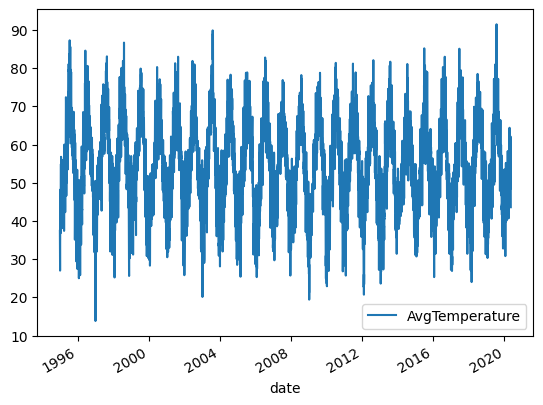

In [159]:
temps.loc[(temps["City"] == "Paris") & (temps["AvgTemperature"] > 0)].plot(x = 'date', y = 'AvgTemperature') 


In [148]:
temps.dtypes

Region                    object
Country                   object
State                     object
City                      object
Month                      int64
Day                        int64
Year                       int64
AvgTemperature           float64
date              datetime64[ns]
dtype: object

In [165]:
tempsMonthYear = temps1.loc[temps1["AvgTemperature"] > 0].groupby(["Country", "Year"]).AvgTemperature.agg("mean")

In [166]:
tempsMonthYear.to_csv("/Users/juan/Documents/Juan's MacBook Pro/CUNEF/Quinto/ETL/Practica Final/tempsMonthYear.csv")

In [162]:
temps1

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9
...,...,...,...,...,...,...,...,...
2906322,North America,US,Additional Territories,San Juan Puerto Rico,7,27,2013,82.4
2906323,North America,US,Additional Territories,San Juan Puerto Rico,7,28,2013,81.6
2906324,North America,US,Additional Territories,San Juan Puerto Rico,7,29,2013,84.2
2906325,North America,US,Additional Territories,San Juan Puerto Rico,7,30,2013,83.8


In [172]:
tempsMonthYear = pd.read_csv("/Users/juan/Documents/Juan's MacBook Pro/CUNEF/Quinto/ETL/Practica Final/tempsMonthYear.csv")
vinos = pd.read_csv("/Users/juan/Documents/Juan's MacBook Pro/CUNEF/Quinto/ETL/Practica Final/winemag-data-130k-v2.csv")

In [174]:
vinos.dtypes

Unnamed: 0                 int64
points                     int64
title                     object
description               object
taster_name               object
taster_twitter_handle     object
price                    float64
designation               object
variety                   object
region_1                  object
region_2                  object
province                  object
country                   object
winery                    object
year                     float64
dtype: object

In [176]:
vinosCountryYear = vinos.groupby(["country","year"]).agg(
    avPrice=pd.NamedAgg(column="price", aggfunc="mean"),
    avPoints=pd.NamedAgg(column="points", aggfunc="mean"),
    count=pd.NamedAgg(column="title", aggfunc="count"))

In [178]:
vinosCountryYear.to_csv("/Users/juan/Documents/Juan's MacBook Pro/CUNEF/Quinto/ETL/Practica Final/vinosCountryYear.csv")
vinosCountryYear = pd.read_csv("/Users/juan/Documents/Juan's MacBook Pro/CUNEF/Quinto/ETL/Practica Final/vinosCountryYear.csv")

In [179]:
vinosCountryYear

,country,year,avPrice,avPoints,count
0,Argentina,1999.0,8.000000,80.000000,1
1,Argentina,2000.0,16.500000,84.750000,4
2,Argentina,2001.0,13.250000,82.500000,4
3,Argentina,2002.0,24.000000,88.000000,3
4,Argentina,2003.0,35.300000,86.400000,10
...,...,...,...,...,...
568,Uruguay,2013.0,24.210526,87.105263,19
569,Uruguay,2014.0,17.333333,85.500000,6
570,Uruguay,2015.0,23.625000,87.312500,32
571,Uruguay,2016.0,16.750000,85.250000,8


In [180]:
tempsMonthYear.head()

,Country,Year,AvgTemperature
0,Albania,1997,71.934783
1,Albania,1998,61.612500
2,Albania,1999,63.116961
3,Albania,2000,63.176945
4,Albania,2001,61.235600


In [186]:
# left_df.merge(right_df, on='user_id', how='left')
vinosCountryYearTemp = vinosCountryYear.merge(tempsMonthYear, left_on=['country',"year"], right_on=["Country","Year"])


In [189]:
vinosCountryYearTemp.to_csv("/Users/juan/Documents/Juan's MacBook Pro/CUNEF/Quinto/ETL/Practica Final/vinosCountryYearTemp.csv")

In [187]:
del vinosCountryYearTemp["Country"]
del vinosCountryYearTemp["Year"]